In [1]:
%matplotlib inline

import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import metrics
from ggplot import *
import statsmodels.api as sm
import pickle 
import numpy as np
import gc

In [2]:
data = pd.read_csv('/Users/8201/PROJECTS/Revops/EORS/Purchase propensity/training_ad_final.csv',error_bad_lines=False)

In [3]:
data['time_since_lp']=data['time_since_lp']*-1

In [4]:
univariate=data.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()
univariate.to_csv('/Users/8201/PROJECTS/Revops/EORS/Purchase propensity/Outputs/univariate.csv')
univariate

count          mean           std   min      1%      5%  \
orders            1815239.0      7.580056     13.520609  1.00    1.00    1.00   
revenue           1815239.0  13373.546856  28952.645668  0.00  349.30  587.16   
weekend_orders    1815239.0      2.837931      5.027008  0.00    0.00    0.00   
weekday_orders    1815239.0      4.744556      9.030157  0.00    0.00    0.00   
last_order_value  1815239.0   1637.733200   1365.284404 -0.25  314.48  468.20   
puchase_flag      3097781.0      0.010616      0.102487  0.00    0.00    0.00   
sessions          2468709.0      7.674426      9.896806  0.00    1.00    1.00   
add_to_carts      2468709.0      2.699902      8.415282  0.00    0.00    0.00   
searches          2468709.0      2.493706      6.945989  0.00    0.00    0.00   
tme_since_ll      2955222.0      7.747526     12.898351  0.00    0.00    0.00   
pf                1815239.0     45.869413     73.748252  0.00    0.00    0.00   
time_since_lp     1815239.0    133.048146    190.713148  1.00    1.00    3.00   

                     10%      15%      20%      30%       40%       50%  \
orders              1.00     1.00     1.00     2.00     2.000     3.000   
revenue           873.63  1153.96  1494.56  2336.89  3482.772  5090.970   
weekend_orders      0.00     0.00     0.00     1.00     1.000     1.000   
weekday_orders      0.00     1.00     1.00     1.00     1.000     2.000   
last_order_value  587.63   701.46   833.00  1039.03  1149.760  1299.000   
puchase_flag        0.00     0.00     0.00     0.00     0.000     0.000   
sessions            1.00     1.00     2.00     2.00     3.000     4.000   
add_to_carts        0.00     0.00     0.00     0.00     0.000     0.000   
searches            0.00     0.00     0.00     0.00     0.000     0.000   
tme_since_ll        0.00     0.00     0.00     1.00     2.000     3.000   
pf                  0.00     0.00     0.00     1.80    10.500    20.625   
time_since_lp       7.00    11.00    16.00    29.00    42.000    65.000   

                       60%           70%        80%       90%        95%  \
orders               5.000      7.000000     10.000     18.00     28.000   
revenue           7415.124  11013.238000  17283.924  31678.17  51378.660   
weekend_orders       2.000      3.000000      4.000      7.00     11.000   
weekday_orders       3.000      4.000000      6.000     11.00     18.000   
last_order_value  1485.218   1729.610000   2122.310   2912.96   3835.522   
puchase_flag         0.000      0.000000      0.000      0.00      0.000   
sessions             6.000      8.000000     11.000     18.00     26.000   
add_to_carts         0.000      1.000000      3.000      8.00     14.000   
searches             1.000      2.000000      3.000      7.00     12.000   
tme_since_ll         4.000      6.000000     11.000     23.00     34.000   
pf                  32.375     47.903226     72.000    121.25    181.625   
time_since_lp       97.000    141.000000    186.000    341.00    516.000   

                           97%          99%         max  
orders               37.000000      62.0000      996.00  
revenue           69763.947000  123127.3048  2759039.44  
weekend_orders       14.000000      23.0000      296.00  
weekday_orders       24.000000      40.0000      700.00  
last_order_value   4668.898800    6891.4850   112663.30  
puchase_flag          0.000000       1.0000        1.00  
sessions             32.000000      47.0000     3788.00  
add_to_carts         19.000000      35.0000     1401.00  
searches             17.000000      31.0000      552.00  
tme_since_ll         43.000000      66.0000       92.00  
pf                  233.333333     358.5000     5587.00  
time_since_lp       617.000000     942.0000    16969.00

In [5]:
data['pf'].fillna(360,inplace=True)
data['tme_since_ll'].fillna(90,inplace=True)
data['time_since_lp'].fillna(942,inplace=True)
data.fillna(0,inplace=True)

data['orders'][data['orders']>62]=62
data['revenue'][data['revenue']>123127]=123127
data['weekend_orders'][data['weekend_orders']>23]=23
data['weekday_orders'][data['weekday_orders']>40]=40
data['last_order_value'][data['last_order_value']>6891]=6891
data['sessions'][data['sessions']>47]=47
data['add_to_carts'][data['add_to_carts']>35]=35
data['searches'][data['searches']>31]=31
data['tme_since_ll'][data['tme_since_ll']>90]=90
data['time_since_lp'][data['time_since_lp']>942]=942
data['pf'][data['pf']>360]=360
data

/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/8201/Library/Enthought/Canopy_64bit/User/lib/pyt

customer_login  orders    revenue  \
0        5b4272da.c1ea.495b.85c9.2f5dc913ed3cii4TpFb1nE     7.0   15480.67   
1        dc87a53d.bd99.4777.9edb.965ecdc74225dmZ5vrOqx2     8.0   37197.36   
2        82524d8a.f95c.4f1a.b73f.18d3fc2b3310ySeWojkMEZ    21.0   25470.70   
3        6bd16dc5.ce08.4798.9210.c3bfd64e46a12Gjf2Hey8L    12.0   21183.33   
4        7a5139e7.1faa.4b8c.a950.c9b53a18e84ePyXrLKzR8U     1.0    1500.92   
5        265e6744.925c.49f7.ab24.c716de45ec9a7mKprgZywp    21.0   33253.00   
6        d0dbb6e0.0f33.4ed2.b94e.5c3d8fb16f7ctxdHnbqAkS     5.0    5946.72   
7                  33c1a88c-37da-4a77-bcbd-b08ec7a8b33c     0.0       0.00   
8        3f61c28a.e845.4dd7.bbca.20c0e5f38bcf9sVbChKijb     3.0    6343.78   
9        398ae92f.d812.43d7.9df2.06e3cf74b2d2H1sDv8kgIE     6.0    6757.20   
10       56b98411.ebe4.49ef.b16b.668b0f007ad5lKoda3aJ66     7.0    3731.21   
11       b5edfa49.ef0c.4c4c.9181.28daff2b9e67TxnEDusj98     0.0       0.00   
12       46248a19.06fe.427d.b3fa.6cf8623b59ae0gtcrEqklr    17.0   32743.07   
13       37a9a63a.fe43.4710.9551.d3ef959a1352R9X10itgPe     5.0    7264.80   
14       effa8d91.03ee.479d.aeec.6547b7d104f6hGMvbl3zTx     1.0    2275.61   
15       44c66080.3927.455a.91c9.a7181c51c5fb67J4JryW77     1.0     734.26   
16       9fa9616b.d67f.4b5f.af3b.ce4495a72b42Nx5S5iACyX    14.0   24276.25   
17       1fbcf8d4.0e11.44de.8528.05991c56886aEdkyCAY6sc     9.0   10147.81   
18       2734954b.4f0f.4a90.a603.dd0f44298a93J24BMgvbQ2     0.0       0.00   
19       dff97c5b.5d49.4526.979d.530784864fd2oJvrxz5t1t     4.0    4381.26   
20       cf3676e4.8b27.4d2b.9bb2.ef044366ed7dOwHAaQndp2     1.0     996.46   
21       8a3fe240.4cf7.4c87.9de3.2381eb4895e4o2InoPSlmn    21.0   49564.75   
22       76bb4f24.b077.4d35.af70.160f14a281d6a0PNcOrBYU     3.0    5063.84   
23       bb511ab6.d3e2.4618.a698.08a97509a528mRb3QBrYut     2.0    1932.06   
24       ac922dcf.7f80.45bb.ace8.555994db0fbajJmiDhOasO     1.0     690.48   
25       15f35100.4a41.4e3f.b3c3.12bc6f61777adb3ayDoh69     1.0    1054.13   
26       dbe4c89b.0587.421a.8a0f.c1cb359f2b0dvBgXeQXt0O    62.0  123127.00   
27       f9f5fa78.e4af.4441.ad59.782c4fb9c264pU5B8cI7Zj    62.0   86619.23   
28       96584263.be31.4fa0.b2a9.8e7a849f389aSm9sG17inn    23.0   27664.62   
29       d15c3248.066c.446f.b64a.3b47017b735fzbuo8qHZVN     6.0   11097.08   
...                                                 ...     ...        ...   
3097751  ef072585.7bce.498c.90d9.17b42429c1eeKOxzfVZjRS     8.0   20369.72   
3097752            288121fb-d4d3-4ce5-ab1e-0c3d739fe2d6     0.0       0.00   
3097753  e9c120bd.05af.4b7d.b2fb.f79c5e4b59ccVe1vS2dchv     1.0     519.17   
3097754  563ca7d7.61e7.43b7.a8a9.a2ef809c8d6297RDuALpBn     2.0    3669.01   
3097755  94bb924d.d9c2.4ae6.85c7.a97a4b4768da7T3LxHKwot     0.0       0.00   
3097756  cf720c0c.6303.4da1.b3c9.6986e3b1c4df57pujN4EpF     0.0       0.00   
3097757  fdc78e81.adcc.4e9e.b98d.4a034ec7d814gqteZzCeOC     0.0       0.00   
3097758  2c51ca0f.28e2.485c.840e.d3123b68f458bj3n7HgdDZ     1.0    1570.64   
3097759  c480ec3b.6f36.416b.a60d.0d9da11bc1757x1qazdpjV     0.0       0.00   
3097760  6fec8c92.6b0b.4926.9ea3.bec279144b1fmaQnxqrJPs     1.0    1301.58   
3097761            EB05D4C2-DB69-425C-979D-20FBD23F5C2C     0.0       0.00   
3097762  1462446f.0d8b.44ed.aaa0.38bb5824105abkqgqjNoc7     0.0       0.00   
3097763  346d33b9.f079.497e.8090.41e21a71f9dffSea2raS6h     0.0       0.00   
3097764  fa1562d5.61a7.4f14.ba63.da858103388dgbzqGKXgdO     3.0    4310.04   
3097765  1fa5367b.3c94.4c6f.838f.74f09775b819GRWVEzpjTW     9.0   39992.22   
3097766  25439404.15b7.40c2.bffb.c992f482f204dnpPhOy3Ov     0.0       0.00   
3097767  2f6b1a11.91c1.44a6.b700.5609cadf96843GGV7bwPJU     1.0     403.52   
3097768  ed2c1149.4c43.4382.9022.6c3c4be84cf3V1oKtgrlau     0.0       0.00   
3097769  bc283d26.bc69.4633.86f2.773d57adc120gWdDYDVxWi     0.0       0.00   
3097770  c8e32754.0d42.4472.9a7a.a2bd7e70586b0qdqUGbEhR     1.0

In [6]:
data['asp']=data['revenue']/data['orders']
data['weekend_ratio']=data['weekend_orders']/data['weekday_orders']
data['last_avg_asp_ratio']=data['last_order_value']/data['asp']
data['search_per_ses']=data['searches']/data['sessions']
data['atc_per_ses']=data['add_to_carts']/data['sessions']
data['pf_recency_ratio']=data['time_since_lp']/data['pf']

ad=data.drop(['orders','revenue','weekend_orders','weekday_orders','last_order_value','pf'],axis=1)

In [7]:
#ad.to_csv('/Users/8201/PROJECTS/Revops/EORS/Purchase propensity/training_ad_final_clean.csv',index=False)
ad=pd.read_csv('/Users/8201/PROJECTS/Revops/EORS/Purchase propensity/training_ad_final_clean.csv',error_bad_lines=False)

In [38]:
corr=ad.ix[:,2:].corr()
corr.to_csv('Users/8201/PROJECTS/Revops/EORS/Purchase propensity/Outputs/corr_matrix.csv')
corr

sessions  add_to_carts  searches  tme_since_ll  \
sessions            1.000000      0.594790  0.503383     -0.337424   
add_to_carts        0.594790      1.000000  0.407410     -0.179940   
searches            0.503383      0.407410  1.000000     -0.186916   
tme_since_ll       -0.337424     -0.179940 -0.186916      1.000000   
time_since_lp      -0.342115     -0.259783 -0.179044      0.273290   
asp                 0.031289      0.068275  0.034204     -0.000738   
weekend_ratio       0.006259     -0.008763 -0.016305     -0.010971   
last_avg_asp_ratio  0.021298      0.026877  0.009773     -0.011253   
search_per_ses     -0.026837      0.053726  0.521721     -0.035012   
atc_per_ses         0.070770      0.540982  0.117787     -0.083825   
pf_recency_ratio   -0.033971     -0.026665 -0.019858      0.001837   

                    time_since_lp       asp  weekend_ratio  \
sessions                -0.342115  0.031289       0.006259   
add_to_carts            -0.259783  0.068275      -0.008763   
searches                -0.179044  0.034204      -0.016305   
tme_since_ll             0.273290 -0.000738      -0.010971   
time_since_lp            1.000000 -0.036629      -0.032138   
asp                     -0.036629  1.000000       0.042563   
weekend_ratio           -0.032138  0.042563       1.000000   
last_avg_asp_ratio      -0.019493 -0.070847       0.022770   
search_per_ses           0.022975  0.018310      -0.024190   
atc_per_ses             -0.106402  0.050790      -0.014678   
pf_recency_ratio        -0.026059 -0.027172      -0.020338   

                    last_avg_asp_ratio  search_per_ses  atc_per_ses  \
sessions                      0.021298       -0.026837     0.070770   
add_to_carts                  0.026877        0.053726     0.540982   
searches                      0.009773        0.521721     0.117787   
tme_since_ll                 -0.011253       -0.035012    -0.083825   
time_since_lp                -0.019493        0.022975    -0.106402   
asp                          -0.070847        0.018310     0.050790   
weekend_ratio                 0.022770       -0.024190    -0.014678   
last_avg_asp_ratio            1.000000       -0.002489     0.015531   
search_per_ses               -0.002489        1.000000     0.137768   
atc_per_ses                   0.015531        0.137768     1.000000   
pf_recency_ratio             -0.022534       -0.003496    -0.008537   

                    pf_recency_ratio  
sessions                   -0.033971  
add_to_carts               -0.026665  
searches                   -0.019858  
tme_since_ll                0.001837  
time_since_lp              -0.026059  
asp                        -0.027172  
weekend_ratio              -0.020338  
last_avg_asp_ratio         -0.022534  
search_per_ses             -0.003496  
atc_per_ses                -0.008537  
pf_recency_ratio            1.000000

In [8]:
ad.drop(['add_to_carts','searches'],axis=1,inplace=True)
ad=ad.replace([np.inf, -np.inf], np.nan)
ad.fillna(0,inplace=True)
ad.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()

count        mean          std       min   1%   5%  \
puchase_flag        3097781.0    0.010616     0.102487  0.000000  0.0  0.0   
sessions            3097781.0    5.997941     8.328916  0.000000  0.0  0.0   
tme_since_ll        3097781.0   11.532128    21.345445  0.000000  0.0  0.0   
time_since_lp       3097781.0  466.193389   421.301156  1.000000  1.0  6.0   
asp                 3097781.0  927.725751  1077.530131  0.000000  0.0  0.0   
weekend_ratio       3097781.0    0.319399     0.670715  0.000000  0.0  0.0   
last_avg_asp_ratio  3097781.0    0.604808     0.594084 -0.000387  0.0  0.0   
search_per_ses      3097781.0    0.261998     0.698125  0.000000  0.0  0.0   
atc_per_ses         3097781.0    0.212213     0.660986  0.000000  0.0  0.0   
pf_recency_ratio    3097781.0    6.733766    47.612246  0.000000  0.0  0.0   

                     10%   15%        20%        30%         40%         50%  \
puchase_flag         0.0   0.0   0.000000   0.000000    0.000000    0.000000   
sessions             0.0   0.0   0.000000   1.000000    2.000000    3.000000   
tme_since_ll         0.0   0.0   0.000000   1.000000    2.000000    3.000000   
time_since_lp       13.0  23.0  36.000000  68.000000  132.000000  246.000000   
asp                  0.0   0.0   0.000000   0.000000    0.000000  839.480000   
weekend_ratio        0.0   0.0   0.000000   0.000000    0.000000    0.000000   
last_avg_asp_ratio   0.0   0.0   0.000000   0.000000    0.000000    0.669169   
search_per_ses       0.0   0.0   0.000000   0.000000    0.000000    0.000000   
atc_per_ses          0.0   0.0   0.000000   0.000000    0.000000    0.000000   
pf_recency_ratio     0.0   0.0   0.136273   0.711864    2.019802    2.616667   

                            60%          70%          80%          90%  \
puchase_flag           0.000000     0.000000     0.000000     0.000000   
sessions               4.000000     6.000000     9.000000    16.000000   
tme_since_ll           5.000000     8.000000    15.000000    32.000000   
time_since_lp        942.000000   942.000000   942.000000   942.000000   
asp                 1148.589000  1395.000000  1678.206429  2124.202000   
weekend_ratio          0.000000     0.294118     0.575000     1.000000   
last_avg_asp_ratio     0.916597     1.000000     1.019607     1.308234   
search_per_ses         0.000000     0.111111     0.333333     0.875000   
atc_per_ses            0.000000     0.000000     0.250000     0.666667   
pf_recency_ratio       2.616667     2.616667     2.616667     5.500000   

                            95%          97%          99%          max  
puchase_flag           0.000000     0.000000     1.000000      1.00000  
sessions              23.000000    30.000000    44.000000     47.00000  
tme_since_ll          78.000000    90.000000    90.000000     90.00000  
time_since_lp        942.000000   942.000000   942.000000    942.00000  
asp                 2646.000000  3093.130000  4308.067750  73431.75000  
weekend_ratio          1.500000     2.000000     3.000000     23.00000  
last_avg_asp_ratio     1.556063     1.737614     2.201438      7.65671  
search_per_ses         1.333333     2.000000     3.000000     31.00000  
atc_per_ses            1.047619     1.500000     2.800000     35.00000  
pf_recency_ratio      14.400000    28.666667   106.000000   8424.00000

In [16]:
ad.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()

count        mean          std       min   1%   5%  \
puchase_flag        3097781.0    0.010616     0.102487  0.000000  0.0  0.0   
sessions            3097781.0    5.997941     8.328916  0.000000  0.0  0.0   
tme_since_ll        3097781.0   11.532128    21.345445  0.000000  0.0  0.0   
time_since_lp       3097781.0  466.193389   421.301156  1.000000  1.0  6.0   
asp                 3097781.0  927.725751  1077.530131  0.000000  0.0  0.0   
weekend_ratio       3097781.0    0.319399     0.670715  0.000000  0.0  0.0   
last_avg_asp_ratio  3097781.0    0.604808     0.594084 -0.000387  0.0  0.0   
search_per_ses      3097781.0    0.261998     0.698125  0.000000  0.0  0.0   
atc_per_ses         3097781.0    0.212213     0.660986  0.000000  0.0  0.0   
pf_recency_ratio    3097781.0    6.733766    47.612246  0.000000  0.0  0.0   

                     10%   15%        20%        30%         40%         50%  \
puchase_flag         0.0   0.0   0.000000   0.000000    0.000000    0.000000   
sessions             0.0   0.0   0.000000   1.000000    2.000000    3.000000   
tme_since_ll         0.0   0.0   0.000000   1.000000    2.000000    3.000000   
time_since_lp       13.0  23.0  36.000000  68.000000  132.000000  246.000000   
asp                  0.0   0.0   0.000000   0.000000    0.000000  839.480000   
weekend_ratio        0.0   0.0   0.000000   0.000000    0.000000    0.000000   
last_avg_asp_ratio   0.0   0.0   0.000000   0.000000    0.000000    0.669169   
search_per_ses       0.0   0.0   0.000000   0.000000    0.000000    0.000000   
atc_per_ses          0.0   0.0   0.000000   0.000000    0.000000    0.000000   
pf_recency_ratio     0.0   0.0   0.136273   0.711864    2.019802    2.616667   

                            60%          70%          80%          90%  \
puchase_flag           0.000000     0.000000     0.000000     0.000000   
sessions               4.000000     6.000000     9.000000    16.000000   
tme_since_ll           5.000000     8.000000    15.000000    32.000000   
time_since_lp        942.000000   942.000000   942.000000   942.000000   
asp                 1148.589000  1395.000000  1678.206429  2124.202000   
weekend_ratio          0.000000     0.294118     0.575000     1.000000   
last_avg_asp_ratio     0.916597     1.000000     1.019607     1.308234   
search_per_ses         0.000000     0.111111     0.333333     0.875000   
atc_per_ses            0.000000     0.000000     0.250000     0.666667   
pf_recency_ratio       2.616667     2.616667     2.616667     5.500000   

                            95%          97%          99%          max  
puchase_flag           0.000000     0.000000     1.000000      1.00000  
sessions              23.000000    30.000000    44.000000     47.00000  
tme_since_ll          78.000000    90.000000    90.000000     90.00000  
time_since_lp        942.000000   942.000000   942.000000    942.00000  
asp                 2646.000000  3093.130000  4308.067750  73431.75000  
weekend_ratio          1.500000     2.000000     3.000000     23.00000  
last_avg_asp_ratio     1.556063     1.737614     2.201438      7.65671  
search_per_ses         1.333333     2.000000     3.000000     31.00000  
atc_per_ses            1.047619     1.500000     2.800000     35.00000  
pf_recency_ratio      14.400000    28.666667   106.000000   8424.00000

In [9]:
Y = ad.puchase_flag 
X = ad.ix[:,['sessions','tme_since_ll','time_since_lp','weekend_ratio',
#             'last_avg_asp_ratio','pf_recency_ratio'
'search_per_ses','atc_per_ses']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6906780247236961

In [11]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

0                    1
0        sessions    [0.0480290104147]
1    tme_since_ll   [-0.0465769328486]
2   time_since_lp  [-0.00129633159695]
3   weekend_ratio     [0.123071100016]
4  search_per_ses    [0.0746107016647]
5     atc_per_ses     [0.413468683345]

In [18]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [25]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.691738716394
0.796052497047


In [19]:
print metrics.classification_report(y_test, predicted)
cm=pd.DataFrame(metrics.confusion_matrix(y_test, predicted))
cm

             precision    recall  f1-score   support

        0.0       1.00      0.69      0.82    919328
        1.0       0.03      0.76      0.05     10007

avg / total       0.99      0.69      0.81    929335



0       1
0  635235  284093
1    2385    7622

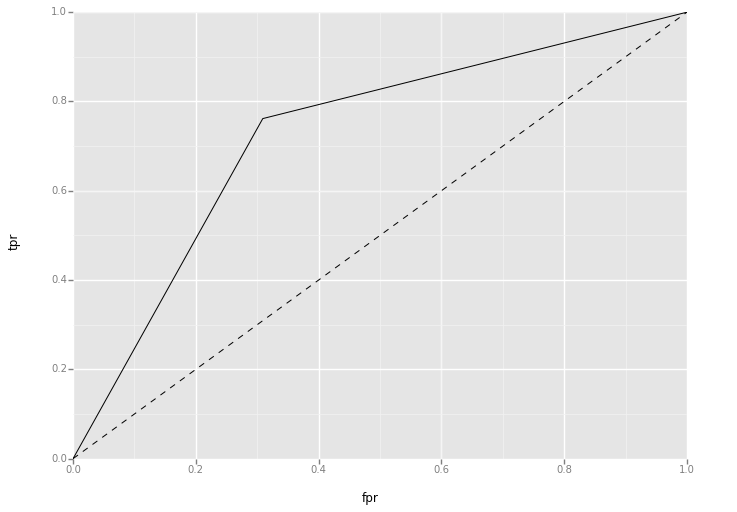

<ggplot: (288081421)>

In [27]:
fpr, tpr, _ = metrics.roc_curve(y_test, predicted)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [28]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

TypeError: 'int' object is not iterable

In [20]:
x=sm.add_constant(X)
logit_mod = sm.Logit(Y, x).fit()
print logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.052516
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:           puchase_flag   No. Observations:              3097781
Model:                          Logit   Df Residuals:                  3097774
Method:                           MLE   Df Model:                            6
Date:                Wed, 31 Aug 2016   Pseudo R-squ.:                  0.1071
Time:                        19:19:37   Log-Likelihood:            -1.6268e+05
converged:                       True   LL-Null:                   -1.8220e+05
                                        LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             -4.3582      0.013   -347.418      0.000        -4.383    -4.334
sessions        

In [30]:
p=pd.DataFrame(probs[:, 1],columns=['Probs'])
p['0.1']=0
p['0.1'][p['Probs']>0.1]=1
p['0.2']=0
p['0.2'][p['Probs']>0.2]=1
p['0.3']=0
p['0.3'][p['Probs']>0.3]=1
p['0.4']=0
p['0.4'][p['Probs']>0.4]=1
p['0.5']=0
p['0.5'][p['Probs']>0.5]=1
p['0.6']=0
p['0.6'][p['Probs']>0.6]=1
p['0.7']=0
p['0.7'][p['Probs']>0.7]=1
p['0.8']=0
p['0.8'][p['Probs']>0.8]=1
p['0.9']=0
p['0.9'][p['Probs']>0.9]=1



/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/8201/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/8201/Library/Enthoug

In [31]:
pred={}
pr=p.ix[:,1:10].columns
for i in pr:
    pred[i]=p[i]

In [32]:
cm={}
for i in pr:
    print i
    print metrics.classification_report(y_test, pred[i])
    cm[i]=pd.DataFrame(metrics.confusion_matrix(y_test, pred[i]))
    cm[i]['p']=i
final = pd.DataFrame()
for i in pr: 
    final=final.append(cm[i])
final
    

0.1
             precision    recall  f1-score   support

        0.0       1.00      0.13      0.23    919328
        1.0       0.01      0.99      0.02     10007

avg / total       0.99      0.14      0.23    929335

0.2
             precision    recall  f1-score   support

        0.0       1.00      0.27      0.42    919328
        1.0       0.01      0.97      0.03     10007

avg / total       0.99      0.28      0.42    929335

0.3
             precision    recall  f1-score   support

        0.0       1.00      0.47      0.64    919328
        1.0       0.02      0.90      0.04     10007

avg / total       0.99      0.47      0.63    929335

0.4
             precision    recall  f1-score   support

        0.0       1.00      0.56      0.72    919328
        1.0       0.02      0.85      0.04     10007

avg / total       0.99      0.56      0.71    929335

0.5
             precision    recall  f1-score   support

        0.0       1.00      0.69      0.82    919328
        1.0  

0       1    p
0  122240  797088  0.1
1      87    9920  0.1
0  246677  672651  0.2
1     254    9753  0.2
0  430153  489175  0.3
1     952    9055  0.3
0  514075  405253  0.4
1    1469    8538  0.4
0  635235  284093  0.5
1    2385    7622  0.5
0  749989  169339  0.6
1    4004    6003  0.6
0  830972   88356  0.7
1    5899    4108  0.7
0  881588   37740  0.8
1    7720    2287  0.8
0  910041    9287  0.9
1    9166     841  0.9

In [83]:
import pickle
# now you can save it to a file
with open('C:\Projects\Revops\EORS\Purchase propensity\Outputs\\model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model2= RandomForestClassifier(n_estimators=50)

In [37]:
model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.99713850379488356

In [ ]:
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)

In [ ]:
print metrics.classification_report(y_test, predicted)
cm=pd.DataFrame(metrics.confusion_matrix(y_test, predicted))
cm